## 1.调整兰德系数

In [1]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

# 基本用法
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print(score)  # 0.24242424242424246

# 与标签名无关
labels_pred = [1, 1, 0, 0, 3, 3]
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print(score)  # 0.24242424242424246

# 具有对称性
score = metrics.adjusted_rand_score(labels_pred, labels_true)
print(score)  # 0.24242424242424246

# 接近 1 最好
labels_pred = labels_true[:]
score = metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243
0.24242424242424243
0.24242424242424243


## 2.Silhouette Coefficient 轮廓系数

In [4]:
import numpy as np
from sklearn.cluster import KMeans

X = [[1,2,3],[1,2,3],[4,6,7],[4,5,6],[2,3,5]]

kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
print(labels)
metrics.silhouette_score(X, labels, metric='euclidean')

[2 2 1 1 0]


0.6371196617847901

## 3.调整互信息

In [1]:
from sklearn.metrics.cluster import entropy, mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

MI = lambda x, y: mutual_info_score(x, y)
NMI = lambda x, y: normalized_mutual_info_score(x, y, average_method='arithmetic')#NMI和AMI的计算均采用算术平均；log函数的底为自然对数e。
AMI = lambda x, y: adjusted_mutual_info_score(x, y, average_method='arithmetic')

A = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
B = [1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3]
#print(entropy(A))
#print(MI(A, B))
print(NMI(A, B))
print(AMI(A, B))

C = [1, 1, 2, 2, 3, 3, 3]
D = [1, 1, 1, 2, 1, 1, 1]
print(NMI(C, D))
print(AMI(C, D))

0.36456177185718985
0.2601812253892505
0.28483386264113447
0.05674883175532439


## 4.Homogeneity, completeness and V-measure

In [3]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

print(metrics.homogeneity_score(labels_true, labels_pred))

print(metrics.completeness_score(labels_true, labels_pred))

print(metrics.v_measure_score(labels_true, labels_pred))

#beta默认值为1.0，但如果beta值小于1:
print(metrics.v_measure_score(labels_true, labels_pred, beta=0.6))

print(metrics.v_measure_score(labels_true, labels_pred, beta=1.8))

#这三个值可以一起计算
print(metrics.homogeneity_completeness_v_measure(labels_true, labels_pred))

labels_pred = [0, 0, 0, 1, 2, 2]
print(metrics.homogeneity_completeness_v_measure(labels_true, labels_pred))


0.6666666666666669
0.420619835714305
0.5158037429793889
0.5467344787062375
0.48447946234141737
(0.6666666666666669, 0.420619835714305, 0.5158037429793889)
(1.0, 0.6853314789615865, 0.8132898335036762)


## 5.Fowlkes-Mallows scores

In [4]:
from sklearn.metrics.cluster import fowlkes_mallows_score
print(fowlkes_mallows_score([0, 0, 1, 1], [0, 0, 1, 1]))

print(fowlkes_mallows_score([0, 0, 1, 1], [1, 1, 0, 0]))


1.0
1.0


## 6.Calinski-Harabaz Index

In [8]:
import numpy as np
from sklearn.cluster import KMeans
X = [[1,2,3],[1,2,5],[2,4,7],[1,2,8]]
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels)  

4.125

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


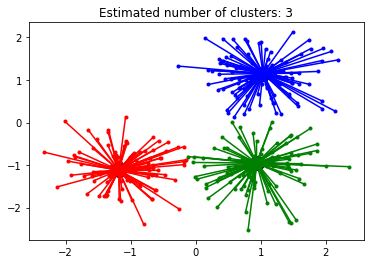

In [9]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [11]:
print(n_clusters_)

3


In [13]:
print(af.cluster_centers_indices_)

[160 250 272]


In [15]:
labels

array([0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1], d

In [17]:
len(labels)

300

In [21]:
X[cluster_centers_indices[0]]

array([1.03325861, 1.15123595])

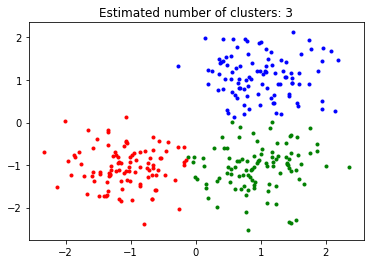

In [24]:
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             #markeredgecolor='k', markersize=14)
    #for x in X[class_members]:
        #plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

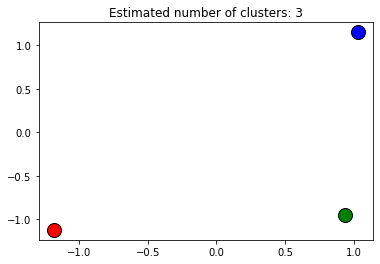

In [27]:
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    #plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    #for x in X[class_members]:
        #plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

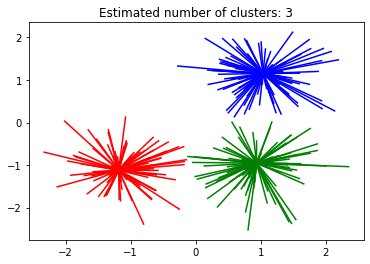

In [29]:
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    #plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             #markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [32]:
X.shape

(300, 2)

In [33]:
labels_true

array([0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0,
       1, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2,
       2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2,
       0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2,
       1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2])